In [42]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('nba_betting_spread.csv')
df.head()

,game_id,book_name,book_id,team_id,a_team_id,spread1,spread2,price1,price2
0,21000358,Pinnacle Sports,238,1610612749,1610612742,7.5,-7.5,-106.0,-104.0
1,21000358,5Dimes,19,1610612749,1610612742,7.5,-7.5,-110.0,-110.0
2,21000358,Bookmaker,93,1610612749,1610612742,7.5,-7.5,-110.0,-110.0
3,21000358,BetOnline,1096,1610612749,1610612742,7.5,-7.5,-110.0,-110.0
4,21000358,Bovada,999996,1610612749,1610612742,8.0,-8.0,-115.0,-105.0


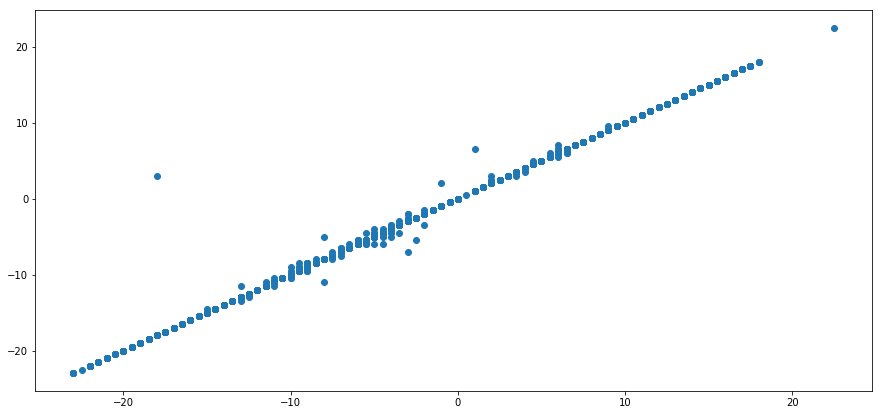

The similarity is 99.98983179905507


In [19]:
from sklearn.metrics import r2_score
df2 = df
df2['spread1'] = -1 * df['spread1']
accuracy =  r2_score(df2['spread1'].values, df2['spread2'].values) * 100
plt.figure(figsize=(15,7))
plt.scatter(df2['spread1'], df2['spread2'])
plt.show()
print('The similarity is ' + str(accuracy))

In [43]:
df3 = pd.read_csv('nba_games_all.csv')
df3.head()

,game_id,game_date,matchup,team_id,is_home,wl,w,l,w_pct,min,...,ast,stl,blk,tov,pf,pts,a_team_id,season_year,season_type,season
0,20800741,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,...,19.0,5.0,4.0,18.0,26.0,111,1610612758,2008,Regular Season,2008-09
1,20800701,2009-01-31,POR vs. UTA,1610612762,f,L,26.0,22.0,0.542,240,...,17.0,6.0,0.0,15.0,22.0,108,1610612757,2008,Regular Season,2008-09
2,20800584,2009-01-16,MEM vs. UTA,1610612762,f,W,24.0,16.0,0.600,240,...,23.0,9.0,3.0,15.0,22.0,101,1610612763,2008,Regular Season,2008-09
3,20800558,2009-01-12,IND @ UTA,1610612762,t,W,23.0,15.0,0.605,240,...,24.0,10.0,6.0,8.0,20.0,120,1610612754,2008,Regular Season,2008-09
4,20800440,2008-12-27,HOU vs. UTA,1610612762,f,L,18.0,14.0,0.563,290,...,35.0,13.0,7.0,9.0,27.0,115,1610612745,2008,Regular Season,2008-09


In [44]:
df4 = df3.merge(df, left_on='game_id', right_on='game_id')
df4.tail()

,game_id,game_date,matchup,team_id_x,is_home,wl,w,l,w_pct,min,...,season_type,season,book_name,book_id,team_id_y,a_team_id_y,spread1,spread2,price1,price2
263375,20800810,2009-02-19,BOS @ UTA,1610612762,t,W,32.0,23.0,0.582,240,...,Regular Season,2008-09,BetOnline,1096,1610612738,1610612762,-2.0,2.0,-110.0,-110.0
263376,20800810,2009-02-19,BOS @ UTA,1610612762,t,W,32.0,23.0,0.582,240,...,Regular Season,2008-09,Bovada,999996,1610612738,1610612762,-3.0,3.0,-110.0,-110.0
263377,20800810,2009-02-19,BOS @ UTA,1610612762,t,W,32.0,23.0,0.582,240,...,Regular Season,2008-09,Intertops,180,1610612738,1610612762,-2.0,2.0,-109.0,-109.0
263378,20800810,2009-02-19,BOS @ UTA,1610612762,t,W,32.0,23.0,0.582,240,...,Regular Season,2008-09,JustBet,1275,1610612738,1610612762,-2.5,2.5,-110.0,-110.0
263379,20800810,2009-02-19,BOS @ UTA,1610612762,t,W,32.0,23.0,0.582,240,...,Regular Season,2008-09,Sportsbetting,999991,1610612738,1610612762,-2.0,2.0,-110.0,-110.0


In [99]:
positions = df4.game_id.unique()
po_dict = dict(zip(positions, range(len(positions))))
df4 = df4.replace({'game_id': po_dict})
df4.head()

,game_id,game_date,matchup,team_id_x,is_home,wl,w,l,w_pct,min,...,season_type,season,book_name,book_id,team_id_y,a_team_id_y,spread1,spread2,price1,price2
0,0,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,...,Regular Season,2008-09,Pinnacle Sports,238,1610612762,1610612758,-2.5,2.5,-113.0,103.0
1,0,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,...,Regular Season,2008-09,5Dimes,19,1610612762,1610612758,-3.0,3.0,-105.0,-105.0
2,0,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,...,Regular Season,2008-09,Bookmaker,93,1610612762,1610612758,-3.0,3.0,-110.0,-110.0
3,0,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,...,Regular Season,2008-09,BetOnline,1096,1610612762,1610612758,-3.0,3.0,-110.0,-110.0
4,0,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,...,Regular Season,2008-09,Bovada,999996,1610612762,1610612758,-3.5,3.5,-105.0,-115.0


In [102]:
bets = []
for x in range(14914):
    df5 = df4[df4.game_id == x]
    bets.append(len(df5))

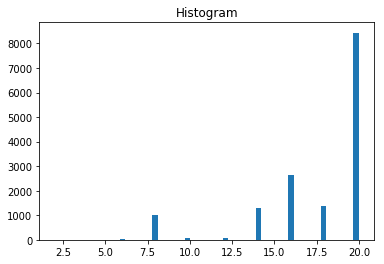

In [110]:
import numpy as np
bets = np.array(bets)
plt.hist(bets, bins='auto')
plt.title("Histogram")
plt.show()

In [121]:
itemindex = np.where(bets==20)
len(itemindex[0])

8437

In [126]:
df5 = df4[df4['game_id']==149141]
for y in itemindex[0]:
    df6 = df4[df4.game_id == (y)]
    df5 = df5.append(df6, ignore_index = True)
len(df5)

168740

In [130]:
df5[df5['game_id']==355]

,game_id,game_date,matchup,team_id_x,is_home,wl,w,l,w_pct,min,...,season_type,season,book_name,book_id,team_id_y,a_team_id_y,spread1,spread2,price1,price2
0,355,2017-02-02,GSW @ LAC,1610612746,t,L,31.0,19.0,0.62,240,...,Regular Season,2016-17,Pinnacle Sports,238,1610612744,1610612746,-7.5,7.5,-109.0,-101.0
1,355,2017-02-02,GSW @ LAC,1610612746,t,L,31.0,19.0,0.62,240,...,Regular Season,2016-17,5Dimes,19,1610612744,1610612746,-7.5,7.5,-110.0,-110.0
2,355,2017-02-02,GSW @ LAC,1610612746,t,L,31.0,19.0,0.62,240,...,Regular Season,2016-17,Bookmaker,93,1610612744,1610612746,-7.5,7.5,-110.0,-110.0
3,355,2017-02-02,GSW @ LAC,1610612746,t,L,31.0,19.0,0.62,240,...,Regular Season,2016-17,BetOnline,1096,1610612744,1610612746,-7.5,7.5,-115.0,-105.0
4,355,2017-02-02,GSW @ LAC,1610612746,t,L,31.0,19.0,0.62,240,...,Regular Season,2016-17,Bovada,999996,1610612744,1610612746,-8.5,8.5,-110.0,-110.0
5,355,2017-02-02,GSW @ LAC,1610612746,t,L,31.0,19.0,0.62,240,...,Regular Season,2016-17,Heritage,169,1610612744,1610612746,-8.0,8.0,-105.0,-105.0
6,355,2017-02-02,GSW @ LAC,1610612746,t,L,31.0,19.0,0.62,240,...,Regular Season,2016-17,Intertops,180,1610612744,1610612746,-7.5,7.5,-110.0,-110.0
7,355,2017-02-02,GSW @ LAC,1610612746,t,L,31.0,19.0,0.62,240,...,Regular Season,2016-17,YouWager,139,1610612744,1610612746,-8.0,8.0,-110.0,-110.0
8,355,2017-02-02,GSW @ LAC,1610612746,t,L,31.0,19.0,0.62,240,...,Regular Season,2016-17,JustBet,1275,1610612744,1610612746,-7.5,7.5,-110.0,-110.0
9,355,2017-02-02,GSW @ LAC,1610612746,t,L,31.0,19.0,0.62,240,...,Regular Season,2016-17,Sportsbetting,999991,1610612744,1610612746,-7.5,7.5,-115.0,-105.0


In [136]:
databox = []
for y in itemindex[0]:
    df6 = df5[df5.game_id == (y)]
    databox.append(df6[df6['is_home'] == 't'].iloc[0]['matchup'][-3:]) #home team
    databox.append(df6[df6['is_home'] == 't'].iloc[0]['matchup'][0:3]) #away team
    databox.append(df6[df6['is_home'] == 't'].iloc[0]['w']) #wins of home team
    databox.append(df6[df6['is_home'] == 't'].iloc[0]['l']) #losses of home team
    databox.append(df6[df6['is_home'] == 't'].iloc[0]['w_pct']) #win percent of home team
    databox.append(df6[df6['is_home'] == 'f'].iloc[0]['w']) #wins of away team
    databox.append(df6[df6['is_home'] == 'f'].iloc[0]['l']) #losses of away team
    databox.append(df6[df6['is_home'] == 'f'].iloc[0]['w_pct']) #win percent of away team
    databox.append(df6.iloc[0]['game_date']) #date of game
    databox.append(df6[df6['is_home'] == 't'].iloc[0]['pts'] - df6[df6['is_home'] == 'f'].iloc[0]['pts']) #win margin of home team (target)
    for z in range(10):
        databox.append(-1*df6.iloc[z]['spread2']) # betting home margin of victory

In [137]:
len(databox)/20

168740

In [143]:
labels = ['HomeTeam','AwayTeam','HTWin','HTLoss','HT%','ATWin','ATLoss','AT%','Date','WinMargin']
for z in range(10):
    labels.append(df6.iloc[z]['book_name'])

In [145]:
import numpy as np
databox2 = np.array(databox)
refined = np.reshape(databox2, (-1, 20))

In [146]:
import pandas as pd
betline = pd.DataFrame(refined, columns=labels)
betline.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,Pinnacle Sports,5Dimes,Bookmaker,BetOnline,Bovada,Heritage,Intertops,YouWager,JustBet,Sportsbetting
0,LAC,GSW,31.0,19.0,0.62,43.0,7.0,0.86,2017-02-02,-13,-7.5,-7.5,-7.5,-7.5,-8.5,-8.0,-7.5,-8.0,-7.5,-7.5
1,PHX,LAC,15.0,34.0,0.306,31.0,18.0,0.633,2017-02-01,-10,-2.5,-2.5,-2.5,-2.5,-3.0,-2.5,-2.5,-2.5,-2.5,-2.5
2,PHI,LAC,16.0,27.0,0.37200000000000005,30.0,17.0,0.638,2017-01-24,11,-4.5,-4.5,-4.5,-4.5,-5.0,-4.5,-4.5,-4.5,-4.5,-4.5
3,ATL,LAC,26.0,19.0,0.578,30.0,16.0,0.652,2017-01-23,-10,7.0,7.0,7.5,7.5,8.0,7.5,7.5,7.5,7.5,7.5
4,LAC,LAL,28.0,14.0,0.667,15.0,29.0,0.341,2017-01-14,16,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5


In [147]:
betline.to_csv('CombinedBettingData2.csv')